# Aufgabe 1 (2P)
Laden Sie den Datensatz
‚herford_weather.csv‘ . Er entstammt der
Open Meteo Api und enthält
Wetterdaten zur Lokation Herford.

## a)
Formen Sie den Datensatz in eine
Zeitreihe um, indem Sie den
Zeitstempel in einen Date Time –
Datentyp dtype('<M8[ns]‘)
umformen und als Index setzen.
Erzeugen Sie den folgenden
DataFrame (mind. Ansicht der
ersten 5 Zeilen und Spalten ) und
zeichnen Sie ein Liniendiagramm
für die Temperaturwerte in 2m
über dem Boden (1)

<img src="images/1a0.png" width="600"> <img src="images/1a1.png" width="600">

                     temperature_2m (°C)  relativehumidity_2m (%)  \
Date time                                                           
1996-01-01 00:00:00                 -2.3                       80   
1996-01-01 01:00:00                 -2.1                       80   
1996-01-01 02:00:00                 -2.0                       79   
1996-01-01 03:00:00                 -2.1                       79   
1996-01-01 04:00:00                 -2.2                       78   

                     dewpoint_2m (°C)  apparent_temperature (°C)  \
Date time                                                          
1996-01-01 00:00:00              -5.3                       -7.2   
1996-01-01 01:00:00              -5.2                       -7.0   
1996-01-01 02:00:00              -5.2                       -6.9   
1996-01-01 03:00:00              -5.3                       -7.0   
1996-01-01 04:00:00              -5.5                       -7.1   

                     pressure_msl (hPa)

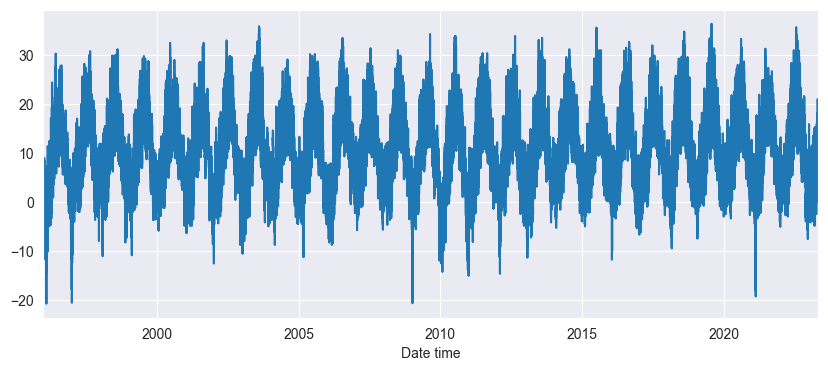

In [180]:
import matplotlib.pyplot as plt
import pandas as pd

# read csv file and parse it to a dataframe
df = pd.read_csv("herford_weather.csv")

# parse time column to a M8 data type
df['time'] = pd.to_datetime(df['time'])

# set time as index
df.set_index('time', inplace=True)

# rename the index to "Date time"
df.index.rename('Date time', inplace=True)

# print first records
print(df.head())

# adjust size and space of the plot
plt.figure(figsize=(10, 4))

# plot a line chart for the temperature_2m values
df['temperature_2m (°C)'].plot()

# show diagram
plt.show()

## b)
Erzeugen Sie einen
Datensatz, der nur die
täglichen Mittelwerte für
2022 enthält (Abb oben) und
stellen Sie wieder die
Temperatur in 2 m
Bodenhöhe einmal für
stündliche Werte (links) und
einmal für die täglichen
Mittelwerte(rechts) dar. (1P)

<img src="images/1b0.png" width="1200">
<img src="images/1b1.png" width="1200">

            temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  \
Date time                                                                    
2022-01-01            11.295833                92.875000         10.175000   
2022-01-02            11.058333                83.458333          8.329167   
2022-01-03             8.708333                87.833333          6.787500   
2022-01-04             6.445833                91.750000          5.187500   
2022-01-05             2.695833                90.916667          1.358333   

            apparent_temperature (°C)  pressure_msl (hPa)  \
Date time                                                   
2022-01-01                   9.137500         1022.158333   
2022-01-02                   7.545833         1012.791667   
2022-01-03                   4.333333         1007.704167   
2022-01-04                   3.116667          997.429167   
2022-01-05                  -2.308333         1000.745833   

            surface_press

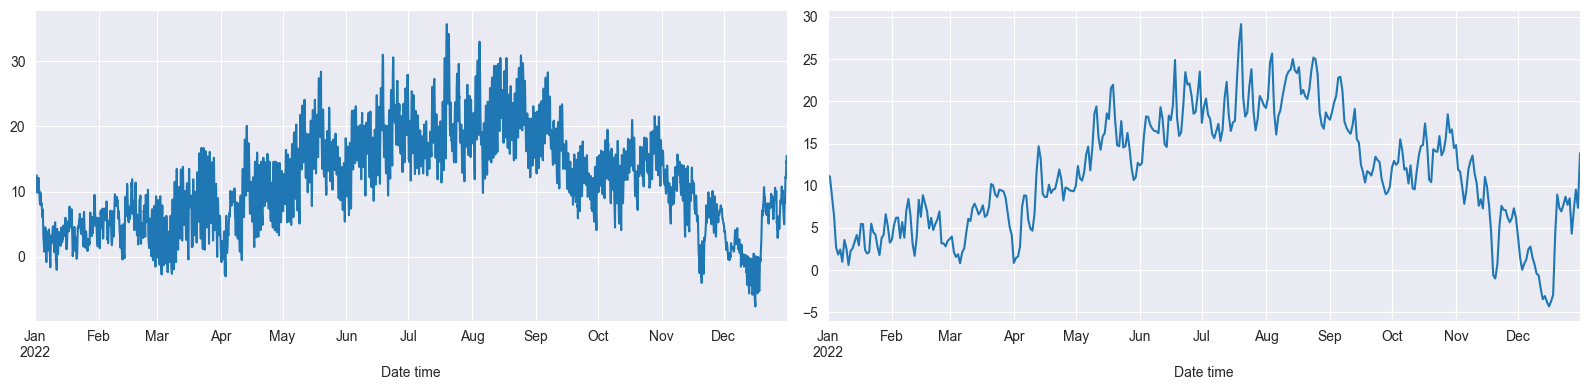

In [181]:
# slice all rows between 2022-01-01 and 2022-12-31
df_2022 = df['2022-01-01':'2022-12-31']

# group hours to days and calculate the daily average
df_2022_daily_mean = df_2022.resample('D').mean()

# print first 5 rows
print(df_2022_daily_mean.head())

# create figure/area with two subplots
fig, ax = plt.subplots(1,2, figsize=(16,4))

# plot the temperature_2m values per month
df_2022['temperature_2m (°C)'].plot(ax=ax[0])

# plot the daily average of the temperature_2m values per month
df_2022_daily_mean['temperature_2m (°C)'].plot(ax=ax[1])

# align the subplots (space)
plt.tight_layout()

# show diagram
plt.show()

# Aufgabe 2 (2P)
Benutzen Sie wieder die gleiche Datei
‚herford_weather.csv‘ wie in Aufgabe 1.
## a)
Zeichnen Sie ein Liniendiagramm für die stündlichen
Werte der Temperatur in 2m über dem Erdboden am
1.August 2022 (siehe Abb) 0.5P

<img src="images/2a0.png" width="600">

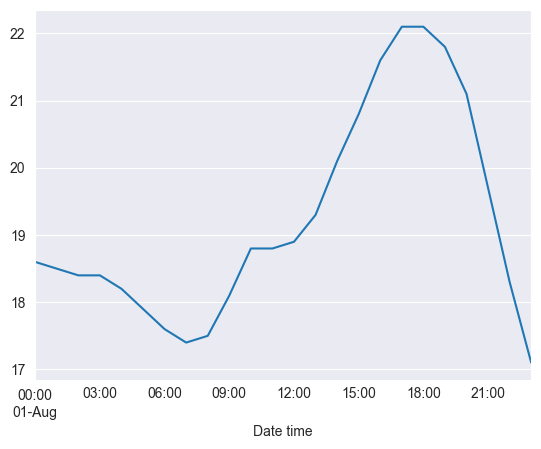

In [182]:
# slice first August
df_August_2022 = df['2022-08-01 00:00:00':'2022-08-01 23:00:00']

# plot the temperature_2m values per hour
df_August_2022['temperature_2m (°C)'].plot()

# show diagram
plt.show()

## b)
Entfernen Sie den Wert für 18:00 Uhr aus der Datei und
zeichnen Sie wieder ein Liniendiagramm (siehe Abb.)
0.5P

<img src="images/2b0.png" width="600">

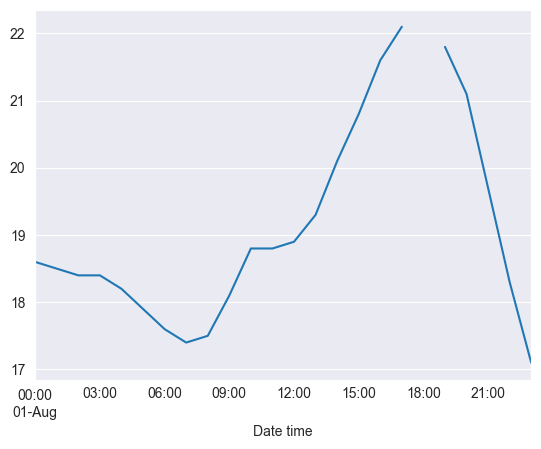

In [183]:
# Delete value for 18:00
df_August_2022.loc['2022-08-01 18:00:00', 'temperature_2m (°C)'] = None

# plot the temperature_2m values per hour
df_August_2022['temperature_2m (°C)'].plot()

# show diagram
plt.show()

## c)
Füllen Sie den fehlenden Wert mit dem globalen
Mittelwert vom 1. August auf und visualisieren Sie das
Ergebnis (siehe Abb) 0.5P

<img src="images/2c0.png" width="600">

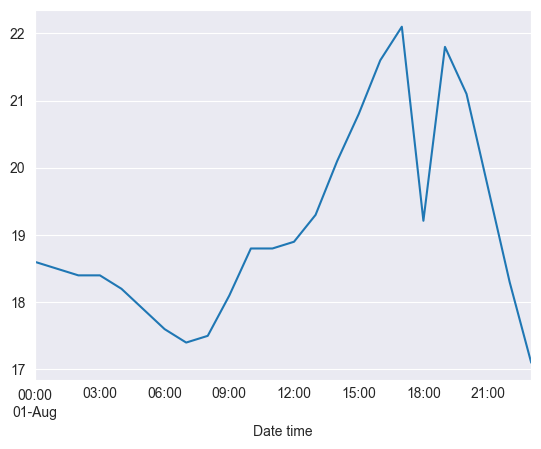

In [184]:
# select global average of the first august in column temperature_2m
global_average = df_2022_daily_mean.loc['2022-08-01','temperature_2m (°C)']

# change value in df_August_2022 at 18:00
df_August_2022.loc['2022-08-01 18:00:00', 'temperature_2m (°C)'] = global_average

# plot the temperature_2m values per hour
df_August_2022['temperature_2m (°C)'].plot()

# show diagram
plt.show()

## d)
Füllen Sie den fehlenden Wert jetzt mit dem Lag 1.
Ordnung auf und zeichnen Sie wieder ein Liniendiagramm
(siehe Abb.) , Erklären Sie den Unterschied! 0.5P

<img src="images/2d0.png" width="600">

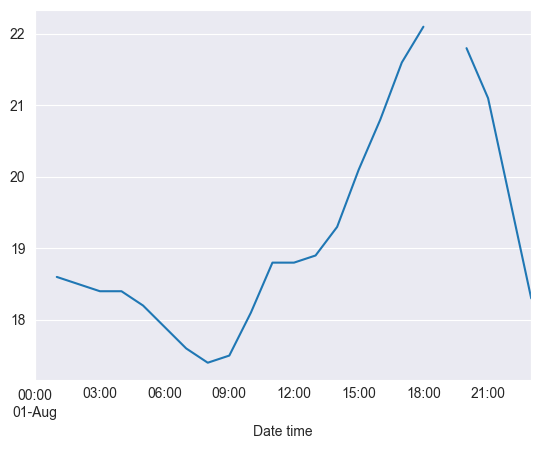

In [185]:
# delete value again for 18:00 (Task preparation)
df_August_2022.loc['2022-08-01 18:00:00', 'temperature_2m (°C)'] = None

# df_August_2022.loc['2022-08-01 18:00:00', 'temperature_2m (°C)'].fillna(method="ffill", inplace=True)
df_August_2022 = df_August_2022['temperature_2m (°C)'].shift(periods=1)
df_August_2022.plot()
plt.show()

# Aufgabe 3 (1P)
GläBung durch gleitende MiBelwerte: GläBen Sie nun mit der rolling-Methode in der gleichen Datei wie in Aufgabe 1 und 2 die
stündlichen Temperaturwerte für den Zeitraum vom 1.Juni 2022 bis zum 3. Juni 2022. Erzeugen Sie Diagramme ähnlich der unten
abgebildeten (links: ohne GläBung, rechts mit GläBung). (1P)

<img src="images/3_0.png" width="1200">